# Decision Tree Worksheet

In [37]:
import numpy as np
import pandas as po
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [38]:
path = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = po.read_csv(path,names=names)
# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
print(data.head())

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

   preg   plas  pres  skin   test  mass   pedi  age  class
0     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
1     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1
2     3   78.0  50.0  32.0   88.0  31.0  0.248   26      1
3     2  197.0  70.0  45.0  543.0  30.5  0.158   53      1
4     1  189.0  60.0  23.0  846.0  30.1  0.398   59      1


/var/folders/_v/mbj674yx6jb6r4hcc3znhr8m0000gn/T/ipykernel_38311/1267670282.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace(to_replace=0, value=np.nan, inplace=True)


## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [39]:
## YOUR CODE HERE
d_tree_entropy = DecisionTreeClassifier(criterion= "entropy",
                                        max_depth=5,min_samples_leaf=5)
# d_tree_gini = DecisionTreeClassifier(criterion= "gini",
#                                         max_depth=15,min_samples_leaf=2)

d_tree_entropy.fit(X_train,y_train)
# d_tree_gini.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

Print accuracy of training and validation data.

In [40]:
## YOUR CODE HERE
y_train_pred=d_tree_entropy.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=d_tree_entropy.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

# y_train_pred=d_tree_gini.predict(X_train)
# print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
# y_val_pred=d_tree_gini.predict(X_val)
# print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.8
Validation Accuracy is  77.77777777777779


Make a model with a low max-depth and higher minimum sample leafs.

In [41]:
## YOUR CODE HERE
d_tree_entropy = DecisionTreeClassifier(criterion= "entropy",random_state=None,
                                        max_depth=5,min_samples_leaf=5)
# d_tree_gini = DecisionTreeClassifier(criterion= "gini",random_state=None,
#                                         max_depth=3,min_samples_leaf=7)

d_tree_entropy.fit(X_train,y_train)
# d_tree_gini.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

Print accuracy of training and validation data.

In [42]:
## YOUR CODE HERE
y_train_pred=d_tree_entropy.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=d_tree_entropy.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

# y_train_pred=d_tree_gini.predict(X_train)
# print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
# y_val_pred=d_tree_gini.predict(X_val)
# print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.8
Validation Accuracy is  77.77777777777779


Explain the accuracy results below. 

(YOUR ANSWER HERE)

## Metrics

Use graphviz to visualize your 2nd tree.

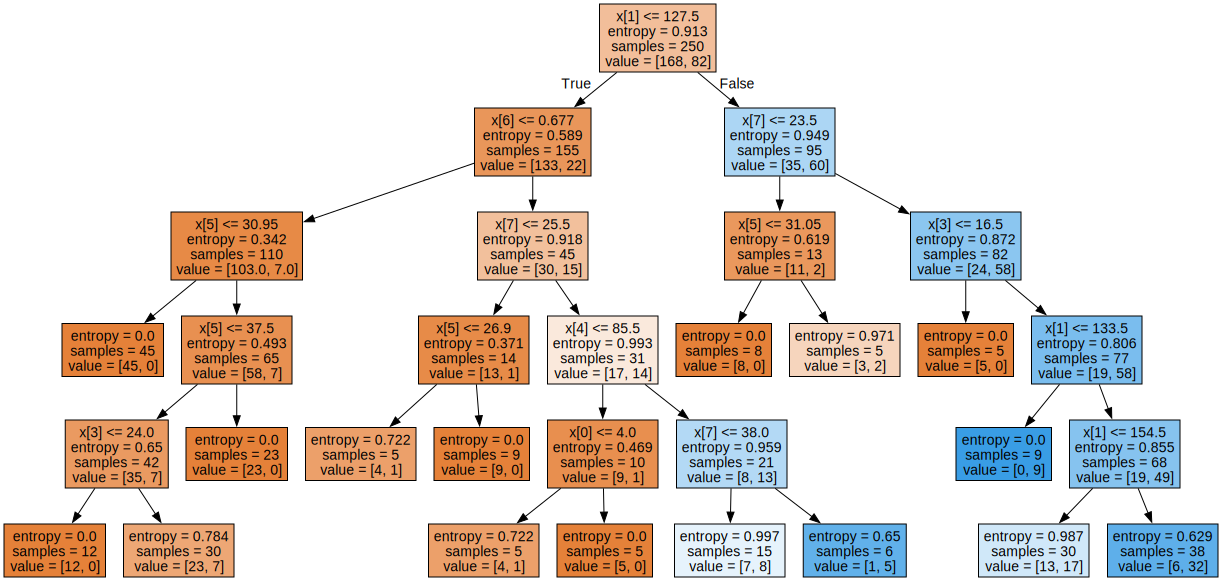

In [43]:
## YOUR CODE HERE

graph_data = tree.export_graphviz(d_tree_entropy,out_file=None,filled=True)

graph = graphviz.Source(graph_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

(YOUR ANSWER HERE)
X[n] likely represents the result of each test(hence why there are comparaters like <= .677)

Question 2: What is the root feature? Does it make sense as the root feature?

(YOUR ANSWER HERE)

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

(YOUR ANSWER HERE) Setting a very large max_depth value would likely cause the model to overfit the data and produce large training accuracy but small test accuracy. This is because higher depth means the tree will go on for a very long time.

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [44]:
## YOUR CODE HERE
d_tree_entropy = DecisionTreeClassifier(criterion= "entropy",random_state=None,
                                        max_depth=500,min_samples_leaf=1)
d_tree_entropy.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=500)

In [45]:

y_train_pred=d_tree_entropy.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=d_tree_entropy.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)


Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [46]:
## YOUR CODE HERE
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train,y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [47]:
## YOUR CODE HERE
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937


How did the accuracy compare to the decision tree's accuracy?

(YOUR ANSWER HERE)

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [48]:
## YOUR CODE HERE
importance = random_forest.feature_importances_
importance.sort()
print(importance[0:3])

[0.06981051 0.08136161 0.08859951]


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

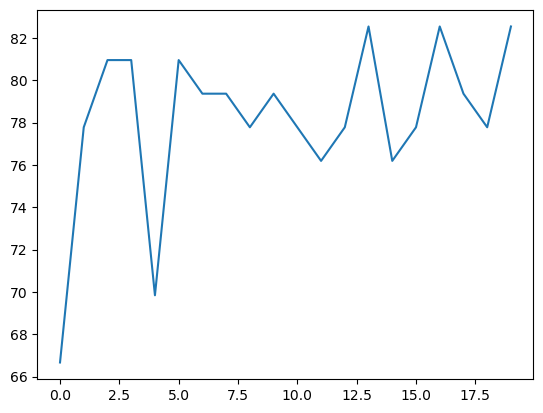

In [ ]:
## YOUR CODE HERE

acc_list = list(range(1,101,5))
accuracies = []
for i in acc_list:
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train,y_train)
    y_val_pred = random_forest.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)*100
    accuracies.append(accuracy)
    
plt.plot(acc_list,accuracies)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f3d2e979-42f4-4fa4-a66a-116a1c2662d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>